In [4]:
#Adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

DATA PREPROSSECING

In [5]:
#CLEANING DATA
def data_cleaning():

    # Load the dataset into a pandas DataFrame
    df = pd.read_csv('earthquake_data.csv')

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Remove outliers
    df = df[df['MAGNITUDE'] > 0]

data_cleaning()

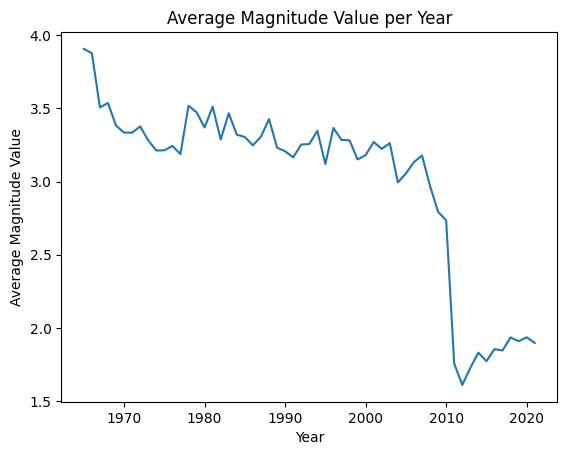

In [6]:
# DONE
def plot_avg_magnitude_by_year(data_filepath: str):
  # Load the data from the CSV file
  data = pd.read_csv(data_filepath)

  # Convert the datetime values to datetime objects
  data["DATETIME"] = pd.to_datetime(data["DATETIME"],format="%m/%d/%Y %H:%M")
  #grouping them by year
  grouped=data.groupby(data.DATETIME.dt.year)['MAGNITUDE'].mean()
  
  plt.plot(grouped)

  # Add a title and axis labels to the plot
  plt.title("Average Magnitude Value per Year")
  plt.xlabel("Year")
  plt.ylabel("Average Magnitude Value")

  # Show the plot
  plt.show()
    
plot_avg_magnitude_by_year('earthquake_data.csv')



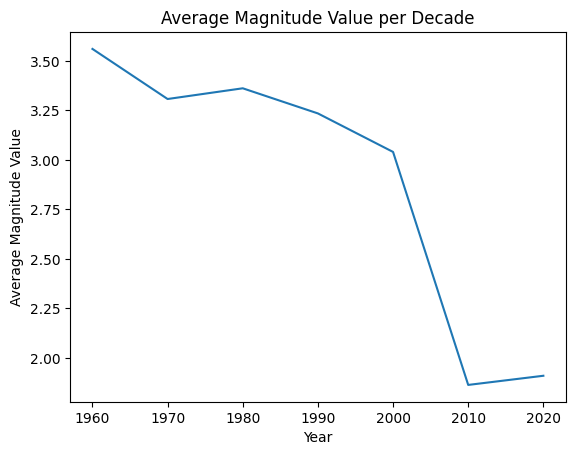

In [7]:
#DONE
def plot_avg_magnitude_by_decade(data_filepath: str):
  # Load the data from the CSV file
  data = pd.read_csv(data_filepath)

  timestamp=[]
  # Get the date and time from the first row of the 'DATETIME' column

  for i in range(len(data['DATETIME'])):
    date_time = data['DATETIME'][i]

    # Split the date and time into separate parts
    date, time = date_time.split(" ")

    # Split the date into its component parts
    day, month, year = date.split("/")


    # Create a tuple with the date and time parts
    result = str((int(year)//10))+'0'

    # Convert the date and time tuple to Unix time
    timestamp.append(result)

  timeStamp=pd.Series(timestamp)
  data.drop('DATETIME',axis=1)
  data['TIME']= timeStamp.values
  data["TIME"] = pd.to_datetime(data["TIME"],format="%Y")
  grouped=data.groupby(data.TIME.dt.year)['MAGNITUDE'].mean()

  plt.plot(grouped)

  # Add a title and axis labels to the plot
  plt.title("Average Magnitude Value per Decade")
  plt.xlabel("Year")
  plt.ylabel("Average Magnitude Value")

  # Show the plot
  plt.show()

plot_avg_magnitude_by_decade('earthquake_data.csv')

In [8]:
def top_strongest_earthquakes(data_filepath: str):
    # Load the data from the CSV file
    data = pd.read_csv(data_filepath)

    # Sort the data by the 'MAGNITUDE' column in descending order
    data.sort_values(by='MAGNITUDE', ascending=False, inplace=True)

    # Get the first 10 rows of the sorted data
    top_10 = data.head(10)

    
    print(top_10)

top_strongest_earthquakes('earthquake_data.csv')


                DATETIME      LAT     LONG  DEPTH  MAGNITUDE
479      2/19/1968 22:45  39.5000  24.8000     10        6.7
226371  10/30/2020 11:51  37.9001  26.8167     12        6.7
8943      8/6/1983 15:43  40.0800  24.8100     22        6.6
48418     6/8/2008 12:25  37.9800  21.5100     25        6.5
39105     1/8/2006 11:34  36.2100  23.4100     69        6.4
7294     1/18/1982 19:27  39.9000  24.5000     10        6.4
137701    5/24/2014 9:25  40.2900  25.4000     28        6.3
6138     2/24/1981 20:53  38.1400  23.0000     10        6.3
7052    12/19/1981 14:10  39.2000  25.3000     10        6.3
49230     7/15/2008 3:26  35.8500  27.9200     56        6.2


In [9]:
#DONE

def top_seismogenic_places(file_path,num_places):

  data = pd.read_csv(file_path)

  clean_data=data.drop(columns=["DATETIME","DEPTH","MAGNITUDE"])
  grouped=clean_data.groupby(["LAT","LONG"])
  top_n=grouped.size().nlargest(num_places)

  #create geolocator object
  geolocator = Nominatim(user_agent="earthquake")

  #for each latitude and longitude pair in top_5_seismogenic_places, get the address
  for lat, longt in top_n.index:
    location = geolocator.reverse("{}, {}".format(lat, longt))
    print(f'{location.address}\n')
  

top_seismogenic_places('earthquake_data.csv', 5)

κ. Τέμενης, Τέμενη, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου, Δυτικής Ελλάδας και Ιονίου, 251 00, Ελλάς

Κορίνθου, Εργατικές Κατοικίες (Αγίου Αθανασίου), Άγιος Αθανάσιος, κ. Αιγίου, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου, Δυτικής Ελλάδας και Ιονίου, 251 00, Ελλάς

Συνοικισμός, κ. Αιγίου, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου, Δυτικής Ελλάδας και Ιονίου, Ελλάς

Σουτραλί, Δήμος Βόλου, Περιφερειακή Ενότητα Μαγνησίας, Περιφέρεια Θεσσαλίας, Αποκεντρωμένη Διοίκηση Θεσσαλίας - Στερεάς Ελλάδος, 385 00, Ελλάς

Εργατικές Κατοικίες (Αγίου Αθανασίου), Άγιος Αθανάσιος, κ. Αιγίου, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου,

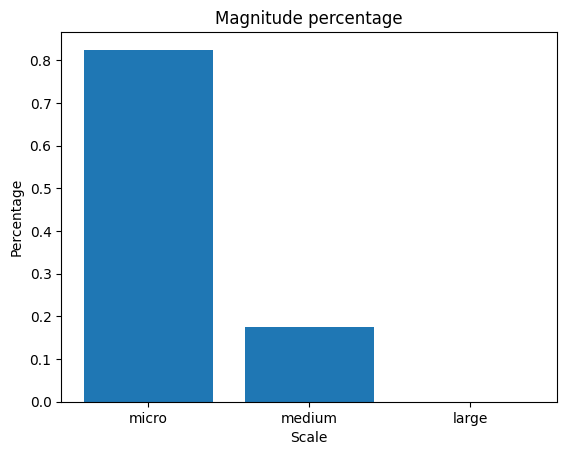

In [10]:
def plot_magnitude_perentage_data(file_path):
  
  data=pd.read_csv(file_path)
  clean_data=data.drop(columns=["DATETIME","LAT","LONG","DEPTH"])
  

  clean_data["magnitude_group"]=pd.cut(clean_data['MAGNITUDE'],bins=[0,3,6,8],labels=["micro","medium","large"])
  vals=clean_data["magnitude_group"].value_counts(normalize=True)
  

  plt.bar(vals.index, vals.values)

  # Add a title and axis labels to the plot
  plt.title("Magnitude percentage")
  plt.xlabel("Scale")
  plt.ylabel("Percentage")

  # Show the plot
  plt.show()
  
  
plot_magnitude_perentage_data('earthquake_data.csv')


MODEL CREATION

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
#DONE
# Load the dataset into a pandas DataFrame
df = pd.read_csv('earthquake_data.csv')

# Convert the DATETIME column to a datetime data type
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Set the index of the DataFrame to the DATETIME column
df.set_index('DATETIME', inplace=True)

# Select the features to use for prediction
X = df[['LAT', 'LONG', 'DEPTH', 'MAGNITUDE']]

# Select the target variable
y = df['MAGNITUDE']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Mean Absolute Error: 3.263486808709601e-06
Mean Squared Error: 1.4537440550807972e-07
R2 Score: 0.9999997834240975


In [22]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train a random forest model on the training data
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Save the model to disk
filename = 'random_forest_model.joblib'
joblib.dump(model, filename)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error of the predictions
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Print the mean absolute error
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R2 Score:", r2_rf)


Mean Absolute Error: 3.263486808709601e-06
Mean Squared Error: 1.4537440550807972e-07
R2 Score: 0.9999997834240975


In [16]:
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train a decision tree regressor on the training data
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

# Save the model to disk
filename = 'decision_tree_model.joblib'
joblib.dump(model, filename)
# Make predictions on the test data
y_pred_dtree = dtree.predict(X_test)

# Calculate evaluation metrics for the decision tree regressor
mae_dtree = mean_absolute_error(y_test, y_pred_dtree)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

# Print the evaluation metrics for the decision tree regressor
print("Decision Tree Regressor Metrics:")
print("Mean Absolute Error:", mae_dtree)
print("Mean Squared Error:", mse_dtree)
print("R2 Score:", r2_dtree)


Decision Tree Regressor Metrics:
Mean Absolute Error: 7.95972394622199e-06
Mean Squared Error: 1.9899309493960562e-06
R2 Score: 0.9999970354403874


In [17]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a gradient boosting regressor on the training data
model_gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
model_gb.fit(X_train, y_train)

# Save the model to disk
filename = 'gradient_boosting_model.joblib'
joblib.dump(model, filename)
# Make predictions on the test data
y_pred_gb = model_gb.predict(X_test)

# Calculate the evaluation metrics for this model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the evaluation metrics
print("Gradient Boosting Regressor")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R2 Score:", r2_gb)


Gradient Boosting Regressor
Mean Absolute Error: 3.61697371738682e-06
Mean Squared Error: 1.9869826987526195e-07
R2 Score: 0.9999997039832633


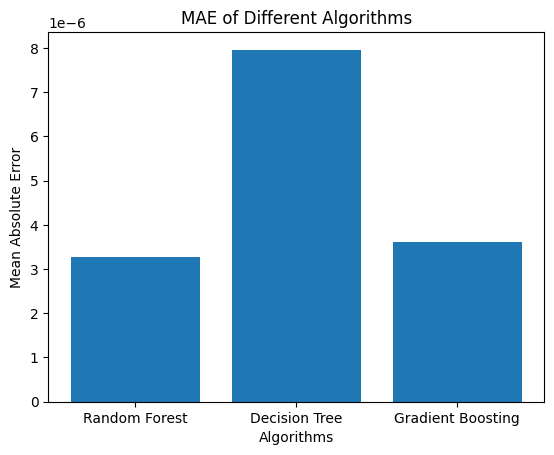

In [27]:
import matplotlib.pyplot as plt


# Create a list of algorithm names
algorithms = ['Random Forest', 'Decision Tree', 'Gradient Boosting']

# Create a list of mean absolute errors
mae_values = [mae_rf, mae_dtree, mae_gb]

# Create the bar plot
plt.bar(algorithms, mae_values)
plt.xlabel('Algorithms')
plt.ylabel('Mean Absolute Error')
plt.title('MAE of Different Algorithms')
plt.show()


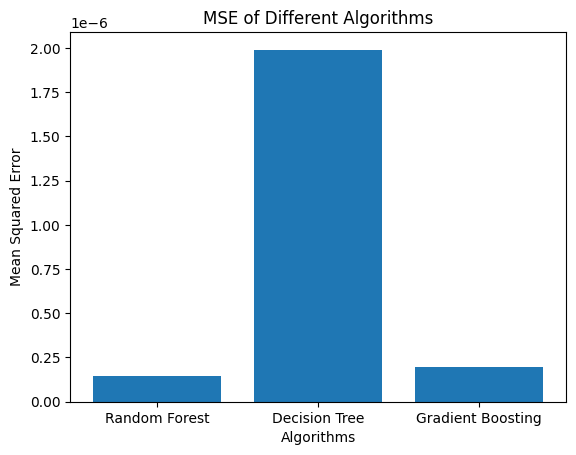

In [28]:
import matplotlib.pyplot as plt


# Create a list of algorithm names
algorithms = ['Random Forest', 'Decision Tree', 'Gradient Boosting']

# Create a list of mean absolute errors
mse_values = [mse_rf, mse_dtree, mse_gb]

# Create the bar plot
plt.bar(algorithms, mse_values)
plt.xlabel('Algorithms')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Different Algorithms')
plt.show()


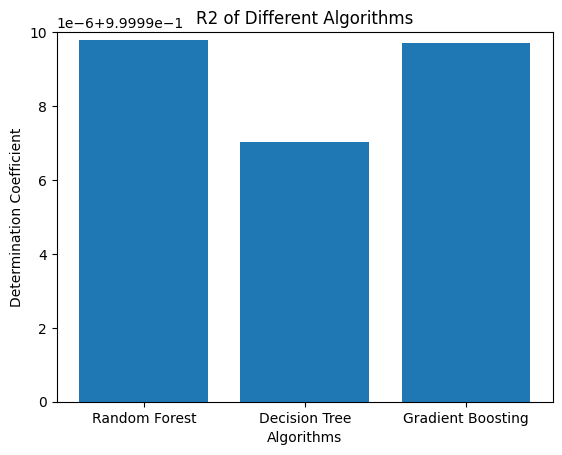

In [34]:
import matplotlib.pyplot as plt


# Create a list of algorithm names
algorithms = ['Random Forest', 'Decision Tree', 'Gradient Boosting']

# Create a list of mean absolute errors
r2_values = [r2_rf, r2_dtree, r2_gb]

# Create the bar plot
plt.bar(algorithms, r2_values)
plt.xlabel('Algorithms')
plt.ylabel('Determination Coefficient')
plt.title('R2 of Different Algorithms')
plt.ylim(0.99999, 1)
plt.show()
